## Урок 1. Двухслойная нейронная сеть на numpy

Домашнее задание:

Задание 1. Попробуйте видоизменить параметры двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, эпох, слоев).

Задание 2. Проведите анализ - что приводит к ухудшению нейронной сети? Что приводит к увеличению ее точности?

In [1]:
'''
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


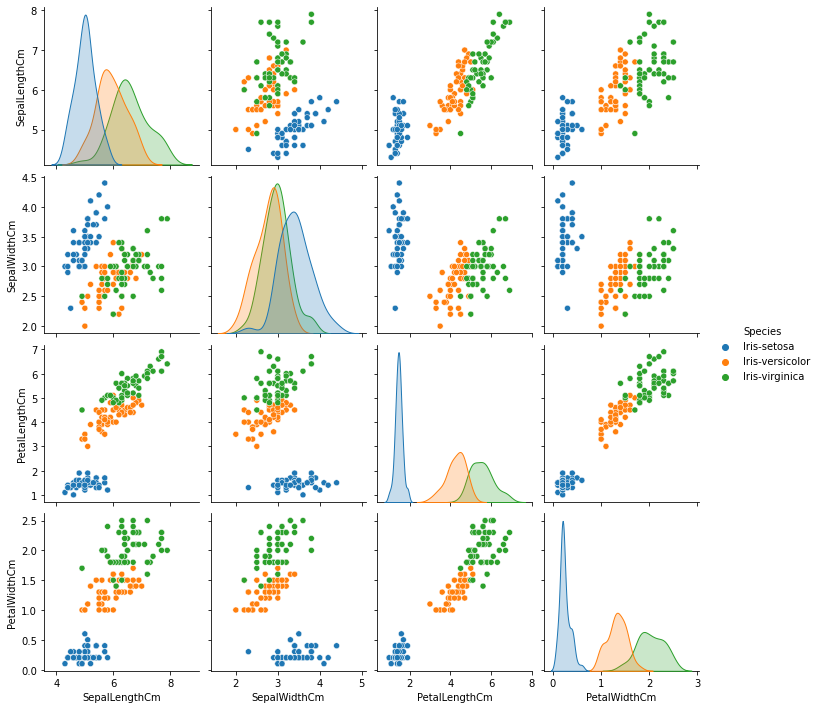

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("./Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [4]:
def train(N, E):
    ### Шаг 3. Обученние нейронной сети
    # присваевание случайных весов
    np.random.seed(0)
    w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 5 выхода
    w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = N

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(E):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100

    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    plt.plot(errors)
    plt.title(f'N={N:.2f}, E={E}')
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # расскоментируйте, чтобы посмотреть 

    print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

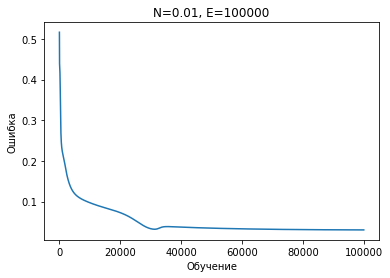

Точность нейронной сети 96.96%


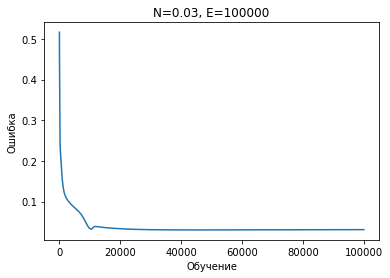

Точность нейронной сети 96.92%


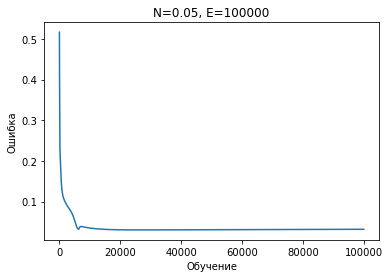

Точность нейронной сети 96.84%


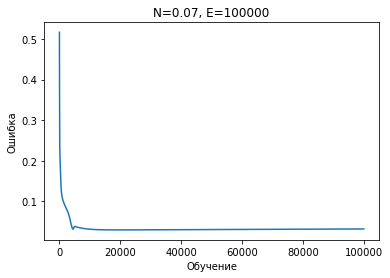

Точность нейронной сети 96.76%


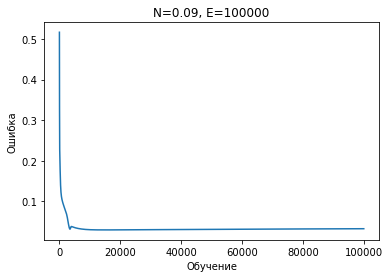

Точность нейронной сети 96.7%


In [6]:
# Запуск с разными шагами
for i_n in np.arange(0.01, 0.1, 0.02):
    train(N=i_n, E=100000)

<ipython-input-2-6fc1c38edf69>:23: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


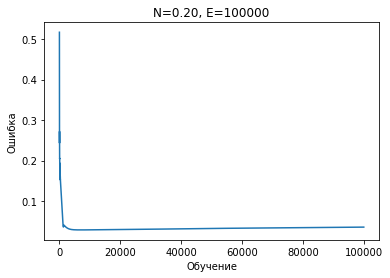

Точность нейронной сети 96.39%


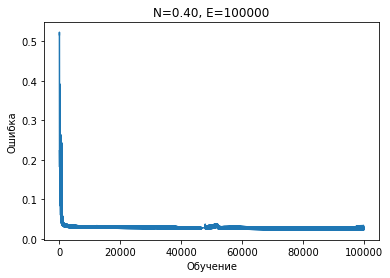

Точность нейронной сети 97.26%


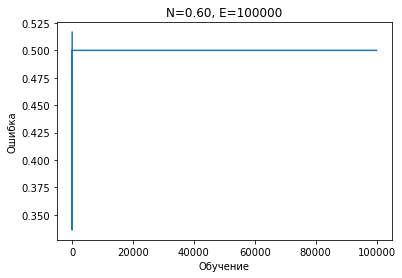

Точность нейронной сети 50.0%


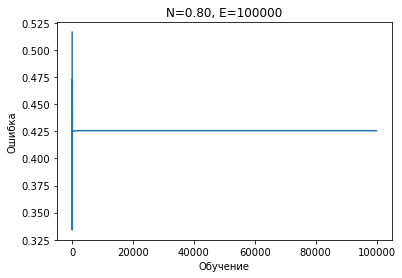

Точность нейронной сети 57.43%


In [7]:
# Запуск с разными большими шагами
for i_n in np.arange(0.2, 1, 0.2):
    train(N=i_n, E=100000)

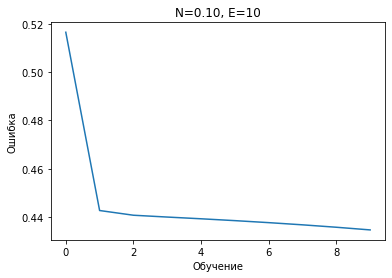

Точность нейронной сети 56.53%


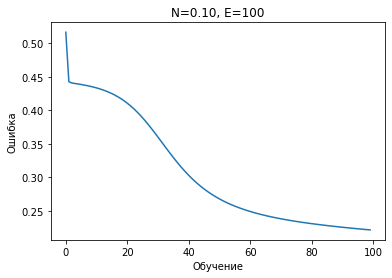

Точность нейронной сети 77.86%


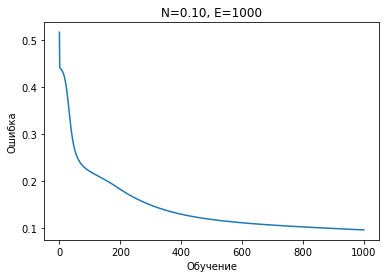

Точность нейронной сети 90.31%


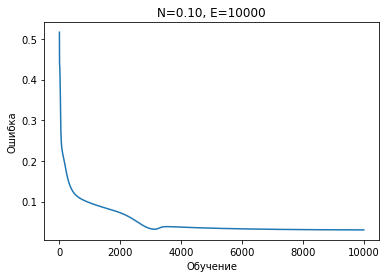

Точность нейронной сети 96.97%


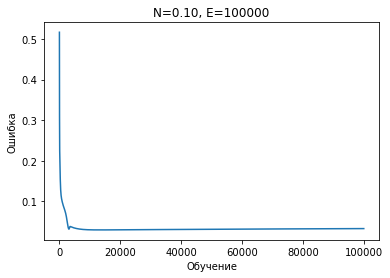

Точность нейронной сети 96.67%


<ipython-input-2-6fc1c38edf69>:23: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


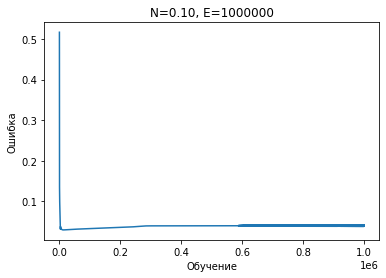

Точность нейронной сети 95.86%


In [8]:
# Запуск с разным количеством эпох
for i_e in range(1, 7):
    train(N=0.1, E=10**i_e)

In [9]:
def train_m(N, E, L):
    ### Шаг 3. Обученние нейронной сети
    # присваевание случайных весов
    np.random.seed(0)
    w0 = 2*np.random.random((4, L)) - 1 # для входного слоя   - 4 входа, 5 выхода
    w1 = 2*np.random.random((L, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = N

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(E):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100


    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    plt.plot(errors)
    plt.title(f'N={N:.2f}, E={E}')
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    #plt.show() # расскоментируйте, чтобы посмотреть 

    print("Точность нейронной сети " + str(L) + ":" + str(round(accuracy,2)) + "%")

Точность нейронной сети 4:96.72%
Точность нейронной сети 5:96.96%
Точность нейронной сети 6:96.8%
Точность нейронной сети 7:90.94%
Точность нейронной сети 8:96.64%
Точность нейронной сети 9:96.74%


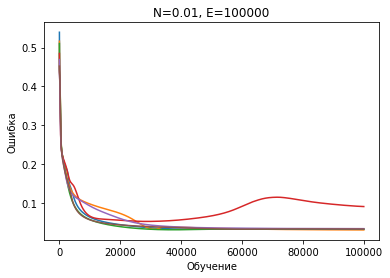

In [11]:
# Попробуем видоизменить число нейронов в слое. Посмотрим, улучшится ли точность
for l_i in range(4, 10):
    train_m(N=0.01, E=100000, L=l_i)

Выводы: 
Для данного набора данных
1. чем меньше шаг, тем медленнее уменьшается ошибка.При маленьком шаге больше вероятность, что получим лучший результат, но зато расчёт будет дольше. А при большом шаге результат будет больше зависеть от случайности. (см. 2 последних графика). 
2. Увеличение количества эпох сначала приводит к улучшению точности, но с некоторого момента может даже начать снижаться.
3. Изменение числа нейронов для модели из двух слоёв не привело к каким либо значимым результатам.